# Desafío - Expansiones basales

# Ejercicio 1: Preparar el ambiente de trabajo

  - Importe los módulos clásicos del trabajo en ciencia de datos.
  - El archivo tiene el nombre compresive_strength_concrete.csv. Importe y genere estadísticas descriptivas.
  - En esta actividad su tarea será predecir la fuerza compresiva del concreto apartir de las medidas en la mezcla, 
  paraesto, utilice un modelo aditivo generalizado de la librería pyGAM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path_casita = "compresive_strength_concrete.csv"
path_colab = "/content/drive/MyDrive/Data Scientist/Desafío Latam/3 .-Machine Learning/1 .-Métodos de regularización lineal y expansiones basales/Desafios/compresive_strength_concrete.csv"
df = pd.read_csv(path_casita)

df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [2]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Ejercicio 2: Descripción

  - El vector objetivo tiene el nombre de Concrete​ compressive strength (MPa, megapascals)

## a) Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere(pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice ​iloc​.

In [3]:
# Por comidad, cambiaremos los nombres de las columnas del dataframe a lo que antecede al caracter "("
df = df.rename(columns = {"Cement (component 1)(kg in a m^3 mixture)":"Cement",
                          "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"Blast Furnace Slag",
                          "Fly Ash (component 3)(kg in a m^3 mixture)":"Fly Ash",
                          "Water  (component 4)(kg in a m^3 mixture)":"Water",
                          "Superplasticizer (component 5)(kg in a m^3 mixture)":"Superplasticizer",
                          "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"Coarse Aggregate",
                          "Fine Aggregate (component 7)(kg in a m^3 mixture)":"Fine Aggregate",
                          "Age (day)":"Age (day)",
                          "Concrete compressive strength(MPa, megapascals) ":"Concrete compressive strength"
}
)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## b) Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decide si es necesario normalizarlos/escalarlos

In [4]:
df.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age (day)                          int64
Concrete compressive strength    float64
dtype: object

**Comentario**

Todas las variables de este dataframe son del tipo float o int, por lo que se pueden estandarizar.

En efecto, se toma la decisión de estandarizar los datos, esto se realizará durante los siguientes pasos, después de separar las muestras.

# Ejercicio 3: Modelo

## a) En base al vector objetivo, decida el mejor modelo e importe con ​pygam​. Condicional a esto, importe las métricas de desempeño asociadas.

In [5]:
#primero instalamos pygram en nuestra máquina
!pip install pygam

In [6]:
#Importamos la librería asociadas a pygam
from pygam import LinearGAM

#Importamos 2 métricas para evaluar los desempeños del modelo, dado que este modelo sería de regresión se importan asociadas metrics para predecir valores contínuos
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Importar los métodos para separar las muestras
from sklearn.model_selection import train_test_split

#Por último importamos nuestro estandarizador
from sklearn.preprocessing import StandardScaler

## b) Genere conjuntos de entrenamiento y validación.

In [7]:
#Separamos las muestras en X e Y
X = df.drop(columns = 'Concrete compressive strength')
y = df['Concrete compressive strength']

#Separamos las muestras en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [8]:
#Mostramos los primeros 5 resultados de X_train para comparar el antes y después de estandarizar
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
554,238.2,158.8,0.0,185.7,0.0,1040.6,734.3,7
913,298.0,0.0,107.0,164.0,13.0,953.0,784.0,28
317,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,56
239,229.7,0.0,118.2,195.2,6.1,1028.1,757.6,3
910,144.0,136.0,106.0,178.0,7.0,941.0,774.0,28


In [9]:
#Como fue enunciado anteriormente, estandarizaremos en función del set de entrenamiento X_train, y redefinimos el dataframe con sus respectivas columnas
#Instanciamos nuestro estandarizador
standardscaler = StandardScaler().fit(X_train)

#Estandarizamos tanto X_train como X_test
X_train = pd.DataFrame(standardscaler.transform(X_train), columns = df.columns[:len(df.columns)-1])
X_test  = pd.DataFrame(standardscaler.transform(X_test), columns = df.columns[:len(df.columns)-1])

#Mostramos los primeros 5 resultados nuevamente de X_train para comparar el antes y después de estandarizar
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
0,-0.401257,0.967021,-0.847166,0.204829,-1.045280,0.876801,-0.511493,-0.611551
1,0.176193,-0.860578,0.832931,-0.817445,1.127679,-0.253821,0.115477,-0.264887
2,-0.269930,-0.860578,0.721448,-1.660703,1.027389,0.430231,1.576304,0.197333
3,-0.483336,-0.860578,1.008792,0.652368,-0.025661,0.715468,-0.217561,-0.677583
4,-1.310886,0.704620,0.817229,-0.157914,0.124775,-0.408700,-0.010674,-0.264887


## c) Genere un primer modelo sin implementar la función​ gridsearch​. Reporte el hiperparámetro ​lam​ así como las métricas de desempeño asociadas.

In [10]:
#Generamos el modelo lineal sin implementar gridsearch, fiteando con el set de training
modelo1 = LinearGAM().fit(X_train, y_train)

#Mostramos los lambdas encontramos pro el modelo
modelo1.lam

[[0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6]]

In [11]:
#Mostramos el summary de nuestro modelo
modelo1.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     82.1173
Link Function:                     IdentityLink Log Likelihood:                                 -3454.5225
Number of Samples:                          824 AIC:                                             7075.2796
                                                AICc:                                            7094.1788
                                                GCV:                                               31.5522
                                                Scale:                                              25.948
                                                Pseudo R-Squared:                                   0.9165
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  


In [12]:
#Mostramos ambos indicadores de desempeño de nuestro modelo recién creado y lo
#guardamos en un dataframe results para compararlo con el gridsearch que haremos más adelante

results = pd.DataFrame()
results = results.append({"Model":"modelo1",
                        "MAE":mean_absolute_error(y_test, modelo1.predict(X_test)),
                        "MSE":mean_squared_error(y_test, modelo1.predict(X_test))
               },
               ignore_index = True
              )

results

,MAE,MSE,Model
0,4.353881,31.557876,modelo1


## d) Genere un segundo modelo implementando ​gridsearch en lambda con un ​logspace entre -3 y 3. Comente sobre el mejor hiper parámetro y sus métricas de desempeño.

In [13]:
#Generamos nuestros lambdas para implementar un segundo modelo usando gridsearch con un logspace entre -3 y 3
lambdas = np.logspace(-3,3,7)
list(lambdas)

[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [14]:
#Generamos un nuevo modelo usando gridsearch
modelo2 = LinearGAM().gridsearch(X_train.values, y_train.values, lam = lambdas)

100% (7 of 7) |##########################| Elapsed Time: 0:00:01 Time:  0:00:01


In [15]:
modelo2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    102.3089
Link Function:                     IdentityLink Log Likelihood:                                 -3387.3386
Number of Samples:                          824 AIC:                                              6981.295
                                                AICc:                                            7011.2412
                                                GCV:                                               30.6584
                                                Scale:                                             23.8929
                                                Pseudo R-Squared:                                   0.9252
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [16]:
#Guardamos las nuestras métricas en el dataframe results

results = results.append({"Model":"modelo2",
                        "MAE":mean_absolute_error(y_test, modelo2.predict(X_test)),
                        "MSE":mean_squared_error(y_test, modelo2.predict(X_test))
               },
               ignore_index = True
              )

results

,MAE,MSE,Model
0,4.353881,31.557876,modelo1
1,4.277928,30.888854,modelo2


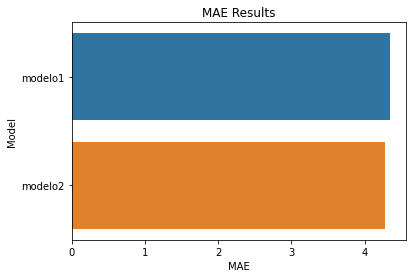

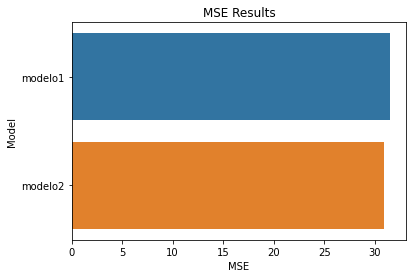

lambdas para model1 = [[0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6]]
lambdas para model2 = [[0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1]]


In [18]:
sns.barplot(data = results,
            x = 'MAE',
            y = 'Model',
            orient = 'h'
           ).set_title("MAE Results")
plt.show()
sns.barplot(data = results,
            x = 'MSE',
            y = 'Model',
            orient = 'h'
           ).set_title("MSE Results")
plt.show()
print(f"lambdas para model1 = {modelo1.lam}")
print(f"lambdas para model2 = {modelo2.lam}")

**Comentario**

El lambda encontrado para el primero modelo es diferente al del modelo con gridsearch, el primero arrojó 0.6 y el segundo 0.1, además, los indicadores de desempeño mejoraron (tanto en MSE como en MAE) en el modelo con gridsearch, por lo que al parecer es una buena práctica usar la grilla para probar con lambdas que no son los que vienen por defecto.

# Ejercicio 4: Dependencia Parcial

  - En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
  - Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
  - Reporte brevemente sobre qué atributos están asociados a mayores y menores niveles de resistencia.

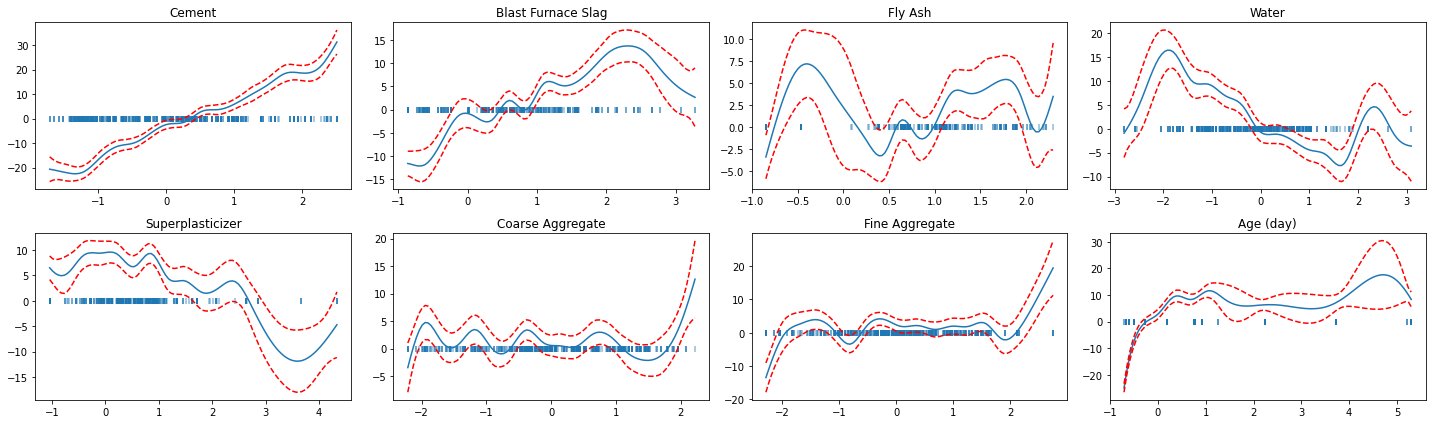

In [40]:
#Generamos nuestra figura
fig, axs = plt.subplots(2,4,figsize = (20,6))

#Guardamos un listado con los títulos
titles = X_train.columns

#Generamos un loop para crear cada plot (por cada variable), recordar que el mejor modelo fue modelo2, por lo que iteraremos sobre los resultados de este
for i, ax in enumerate(axs.flatten()):
  XX = modelo2.generate_X_grid(term=i)
  ax.plot(XX[:, i],
          modelo2.partial_dependence(term=i, X=XX)
          )
  ax.plot(XX[:, i],
          modelo2.partial_dependence(term=i, X=XX,width=.95)[1], c='r', ls='--')
  ax.scatter(X_train[titles[i]],
             [0]*len(X_train[titles[i]]),
             marker = '|', alpha = .5
  )
  ax.set_title(titles[i])
  fig.tight_layout()


**Comentario Final (Reporte brevemente sobre qué atributos están asociados a mayores y menores niveles de resistencia)**

  - Cement: El gráfico no muestra que haya una resistencia al aumentar el cemento, por el contrario, al parecer a mayor cantidad de cemento al resistencia aumenta.
  - Blaust Furnace Slag: Al parecer hay un óptimo entre 2 y 3 veces la desviación estándar.
  - Fly Ash: Bien oscilante el gráfico, no podría comentar tendencia alguna.
  - Water: al parecer hay un óptimo cercano al -2 veces la desviación estándard.
  - SuperPlasticizer: Al parecer hay un óptimo sobre el área de -1 y 1 desviaciones estándar de los datos.
  - Coarse Aggregate: Bien oscilante el gráfico, no podría decir si realmente hay un óptimo sobre las 2 desviaciones estándar.
  - Fine Aggregate: Bien oscilante el gráfico, no podría decir si realmente hay un óptimo sobre las 2 desviaciones estándar.
  - Age (day): Al parecer hay un óptimo entre las 4 y 5 desviaciones estándard de los datos.